In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# import  data
df=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [4]:
# split the data into independent and dependent variables
x=df.drop(['SalePrice'],axis=1)
y_train=df[['SalePrice']]

In [5]:
# droping unnecessary variable
x=x.drop(['Id'],axis=1)

In [6]:
# Get the Sale price Rate
y_train.mean()

SalePrice    180921.19589
dtype: float64

In [7]:
# splitting data into number and category
num=x.select_dtypes(include='number')
char=x.select_dtypes(include='object')

In [8]:
# creating new dataframe to check how many unique values present in each independent variables
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
df_value_counts=pd.DataFrame(num.apply(lambda x : unique_levels(x)))
df_value_counts.columns=['feature_levels']
df_value_counts.head()

,feature_levels
MSSubClass,15
LotFrontage,110
LotArea,1073
OverallQual,10
OverallCond,9


In [9]:
# slicing independent variable which are numerical but behave like categorical data
slice1=df_value_counts.loc[df_value_counts['feature_levels']<=20]
cat_list=slice1.index
cat=num.loc[:,cat_list]
cat.shape

(1460, 16)

In [10]:
# adding those catogical dataset to previous categorical dataset
char_1=pd.concat([char,cat],axis=1,join="inner")
char_1.shape

(1460, 59)

In [11]:
# updating only dataset which are numbers as well as behave like numerical data
slice2=df_value_counts.loc[df_value_counts['feature_levels']>20]
num_list=slice2.index
num=num.loc[:,num_list]
num.shape

(1460, 20)

In [12]:
# updating categorical data with zero variance
char_1 = char_1.loc[:,char_1.apply(pd.Series.nunique) != 1]

In [13]:
# checking numerical data with zero variance
from sklearn.feature_selection import VarianceThreshold 
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(num)

constant_filter.get_support().sum()

20

In [14]:
# checking outliers in numerical dataset
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,1978.506164,472.980137,94.244521,46.660274,21.954110,15.060959,43.489041
std,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,24.689725,213.804841,125.338794,66.256028,61.119149,55.757415,496.123024
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,21.000000,1680.000000,1899.180000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,520.000000,0.000000,0.000000,692.180000,1916.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,34.000000,3311.700000,1916.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,519.300000,672.950000,0.000000,0.000000,848.000000,1930.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,44.000000,5000.000000,1924.900000,1950.000000,0.000000,0.000000,0.000000,74.900000,636.900000,756.900000,0.000000,0.000000,912.000000,1945.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,1961.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,1980.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000
75%,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,2002.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000


In [15]:
# removing outliers
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)
num1=num.apply(lambda x : outlier_cap(x))

# Missing value handing

In [16]:
#cheking which categorical variables are having missing value
columns=char_1.columns

for column in columns:
    if char_1[column].isnull().sum()>0:
        per=((char_1[column].isnull().sum())/(len(x)))*100  
        per=format(per,".2f")
        print(f'{column} =  {per}')

Alley =  93.77
MasVnrType =  0.55
BsmtQual =  2.53
BsmtCond =  2.53
BsmtExposure =  2.60
BsmtFinType1 =  2.53
BsmtFinType2 =  2.60
Electrical =  0.07
FireplaceQu =  47.26
GarageType =  5.55
GarageFinish =  5.55
GarageQual =  5.55
GarageCond =  5.55
PoolQC =  99.52
Fence =  80.75
MiscFeature =  96.30


In [17]:
#droping variables which have 75% of missing values
a=['Alley','PoolQC','Fence','MiscFeature']
char_1=char_1.drop(a,axis=1)

In [18]:
#filling the missing values 
char1=char_1.fillna({'FireplaceQu': char_1.FireplaceQu.mode()[0],'MasVnrType':char_1.MasVnrType.mode()[0],
                    'BsmtQual':char_1.BsmtQual.mode()[0],'BsmtCond':char_1.BsmtCond.mode()[0],
                    'BsmtExposure':char_1.BsmtExposure.mode()[0],'BsmtFinType1':char_1.BsmtFinType1.mode()[0],
                    'BsmtFinType2':char_1.BsmtFinType2.mode()[0],'Electrical':char_1.Electrical.mode()[0],
                    'GarageType':char_1.GarageType.mode()[0],'GarageFinish':char_1.GarageFinish.mode()[0],
                    'GarageQual':char_1.GarageQual.mode()[0],'GarageCond':char_1.GarageCond.mode()[0]})
char1.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
MSSubClass       0
OverallQual      0
OverallCond      0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
3SsnPorch        0
PoolArea    

In [19]:
#cheking which numerical variables are having missing value
columns=num.columns

for column in columns:
    if num[column].isnull().sum()>0:
        per1=((num[column].isnull().sum())/(len(x)))*100  
        per1=format(per1,".2f")
        print(f'{column} =  {per1}')

LotFrontage =  17.74
MasVnrArea =  0.55
GarageYrBlt =  5.55


In [20]:
#filling the missing values
num1=num.fillna({'LotFrontage' : num.LotFrontage.mean(),'MasVnrArea':num.MasVnrArea.mean(), 'GarageYrBlt':num.GarageYrBlt.mean()})
num1.isnull().sum()

LotFrontage      0
LotArea          0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
GarageYrBlt      0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
ScreenPorch      0
MiscVal          0
dtype: int64

In [21]:
#checking shapes
char1.shape, num1.shape

((1460, 55), (1460, 20))

# Duplicate Values handeling

In [22]:
#checking any duplicate values are there or not
char1.duplicated().sum(),num1.duplicated().sum()

(1, 3)

In [23]:
# droping duplicate values
char1.drop_duplicates()
num1.drop_duplicates()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,2003.0,548,0,61,0,0,0
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,1976.0,460,298,0,0,0,0
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,2001.0,608,0,42,0,0,0
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1998.0,642,0,35,272,0,0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,2000.0,836,192,84,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,1999,2000,0.0,0,0,953,953,953,694,0,1647,1999.0,460,0,40,0,0,0
1456,85.0,13175,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1978.0,500,349,0,0,0,0
1457,66.0,9042,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,1941.0,252,0,60,0,0,2500
1458,68.0,9717,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1950.0,240,366,0,112,0,0


# Correlation 

<AxesSubplot:>

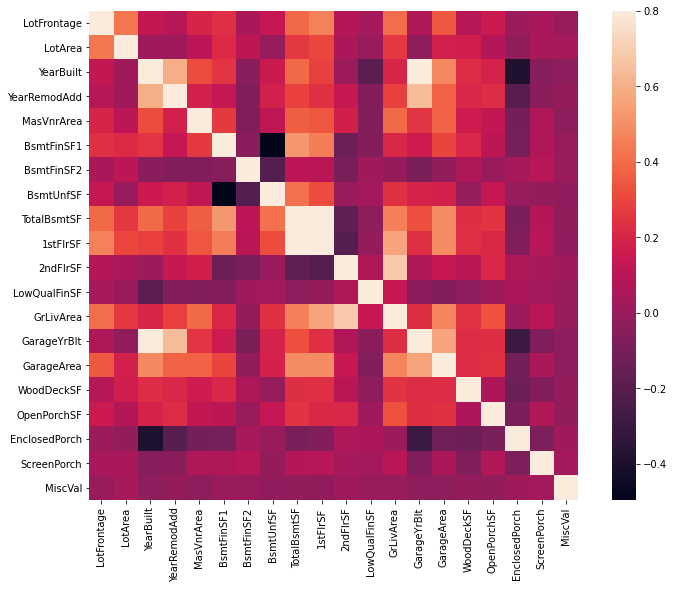

In [24]:
from scipy import stats
corrs=num.corr()
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrs,vmax=.8,square=True)

In [25]:
# checking variables which are highly correlated
upper_tri = corrs.where(np.triu(np.ones(corrs.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
print(); print(to_drop)


['1stFlrSF', 'GarageYrBlt']


In [26]:
# dropping variables which are highly correlated
num1=num1.drop(['1stFlrSF','GarageYrBlt'],axis=1)

# Part 1 - Bi Variate Analysis (Feature Discretization)

In [27]:
# converting datatype
num1['LotFrontage']=num1['LotFrontage'].astype(int)
num1['MasVnrArea']=num1['MasVnrArea'].astype(int)

In [28]:
# ranking data into 10 groups of numerical variables/columns
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num1),index=num1.index, columns=num1.columns).add_suffix('_Rank')
num_binned.head()

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.

,LotFrontage_Rank,LotArea_Rank,YearBuilt_Rank,YearRemodAdd_Rank,MasVnrArea_Rank,BsmtFinSF1_Rank,BsmtFinSF2_Rank,BsmtUnfSF_Rank,TotalBsmtSF_Rank,2ndFlrSF_Rank,LowQualFinSF_Rank,GrLivArea_Rank,GarageArea_Rank,WoodDeckSF_Rank,OpenPorchSF_Rank,EnclosedPorch_Rank,ScreenPorch_Rank,MiscVal_Rank
0,3.0,3.0,8.0,6.0,2.0,4.0,0.0,1.0,3.0,3.0,0.0,7.0,6.0,0.0,3.0,0.0,0.0,0.0
1,7.0,5.0,5.0,2.0,0.0,5.0,0.0,3.0,7.0,0.0,0.0,3.0,4.0,4.0,0.0,0.0,0.0,0.0
2,4.0,7.0,7.0,6.0,2.0,2.0,0.0,4.0,4.0,3.0,0.0,7.0,7.0,0.0,2.0,0.0,0.0,0.0
3,3.0,5.0,0.0,1.0,0.0,0.0,0.0,5.0,2.0,2.0,0.0,7.0,8.0,0.0,1.0,1.0,0.0,0.0
4,7.0,8.0,7.0,5.0,4.0,4.0,0.0,5.0,6.0,4.0,0.0,9.0,9.0,3.0,4.0,0.0,0.0,0.0


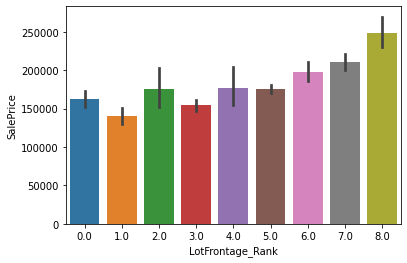

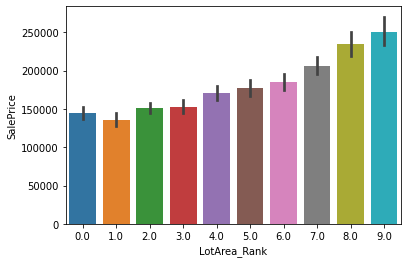

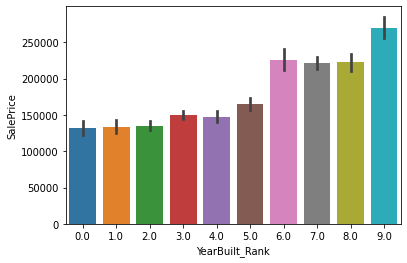

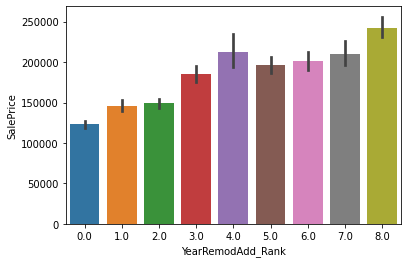

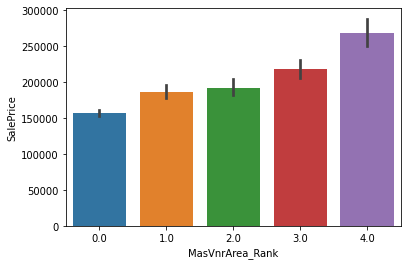

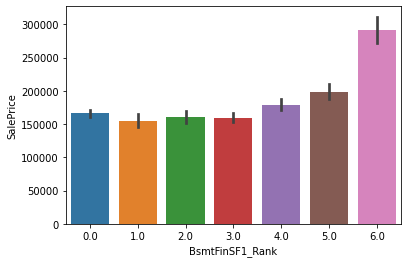

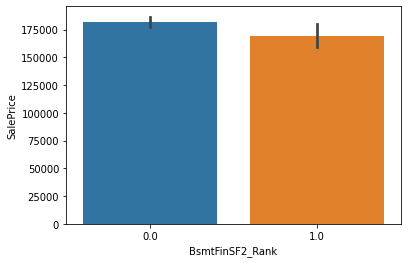

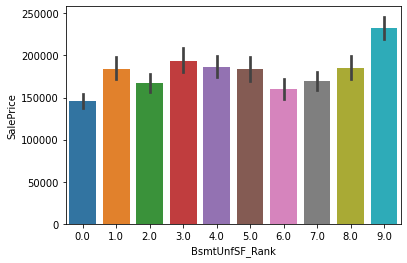

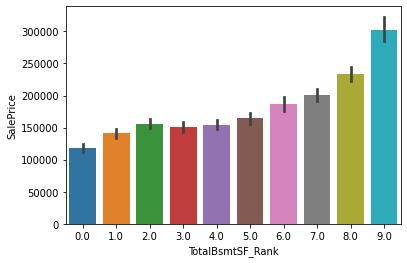

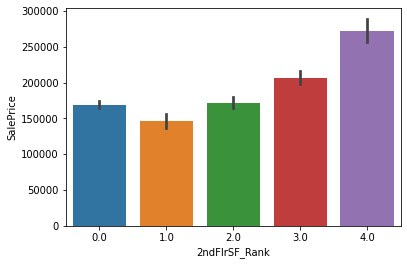

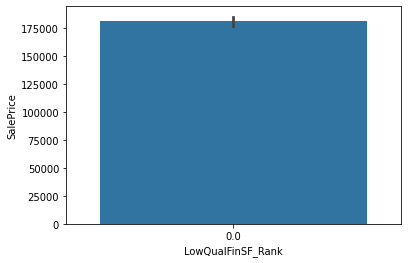

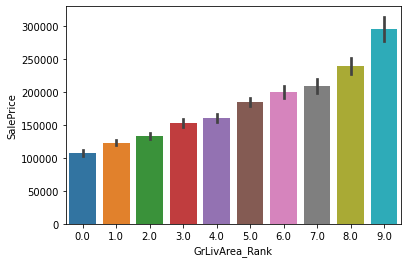

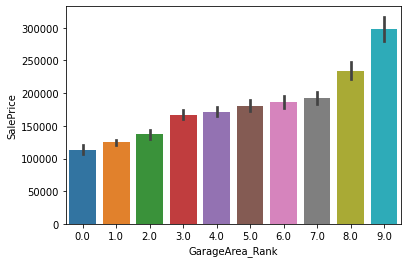

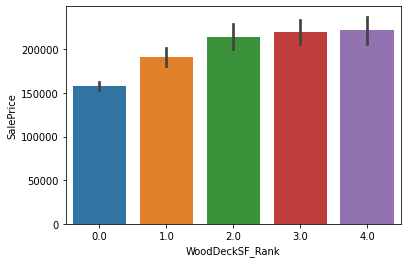

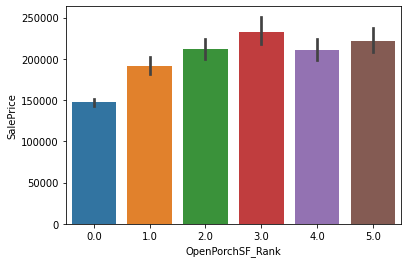

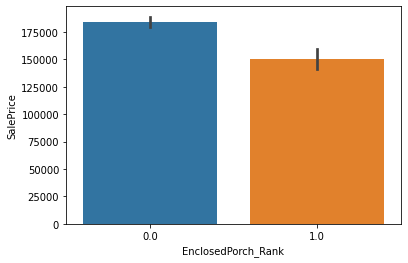

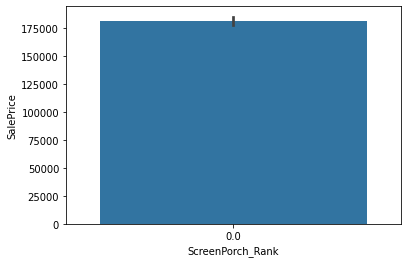

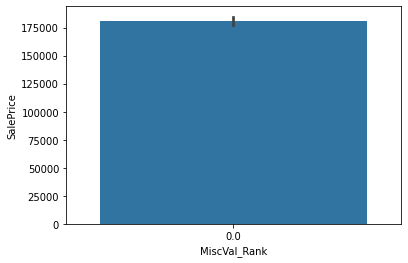

In [29]:
# checking raletionship between each groups of a variables with target variable
X_bin_combined=pd.concat([y_train,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col,y=y_train.mean(),data=X_bin_combined,color='red')
    sns.barplot(x=col, y="SalePrice",data=X_bin_combined, estimator=mean )
plt.show()

In [30]:
# dropping those columns which have sigle barplot and have all barplot values that are less than mean of target variable
b=['BsmtFinSF2','LowQualFinSF','EnclosedPorch','ScreenPorch','MiscVal']
num1=num1.drop(b,axis=1)

# Part 2 - Select K Best

In [31]:
# numerical feature selection
random_state=42
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2,k=11)
selector.fit_transform(num1, y_train)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_num = num.iloc[:,cols]

# Part 1 - Bi Variate Analysis

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


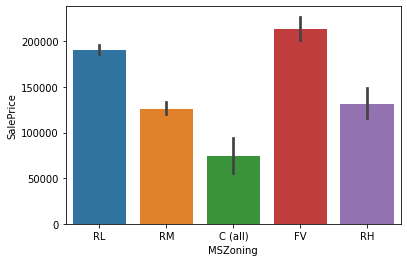

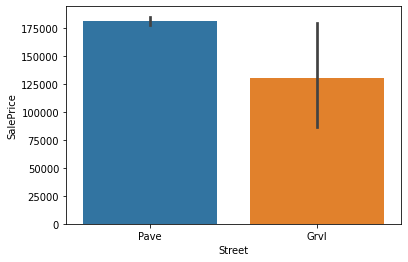

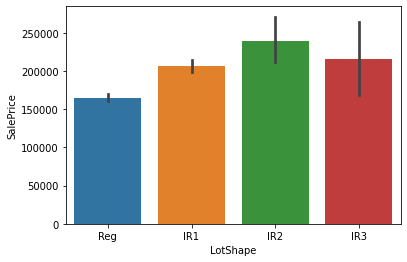

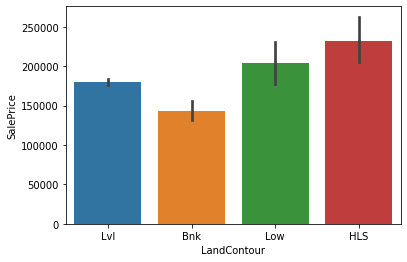

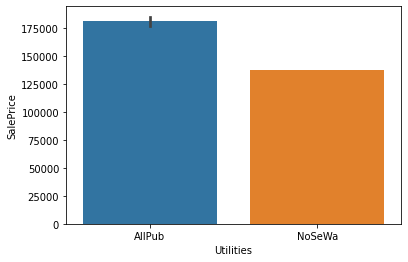

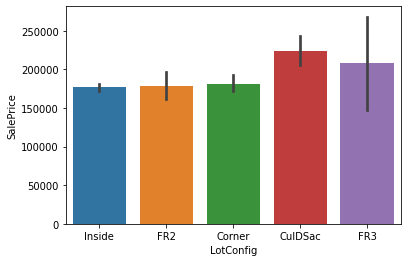

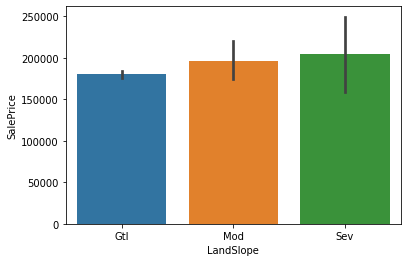

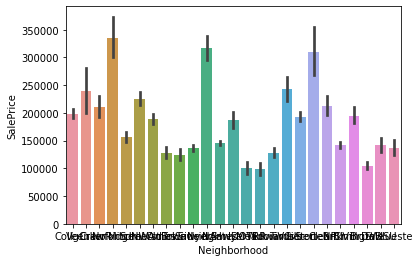

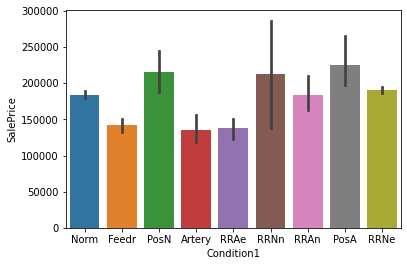

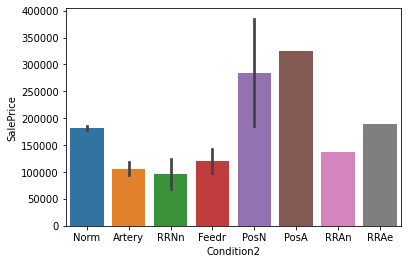

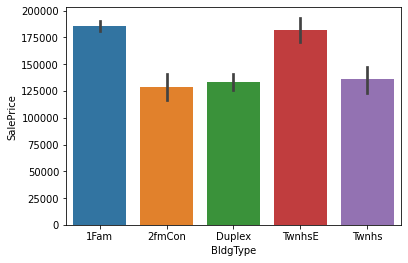

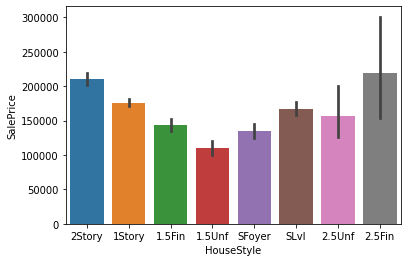

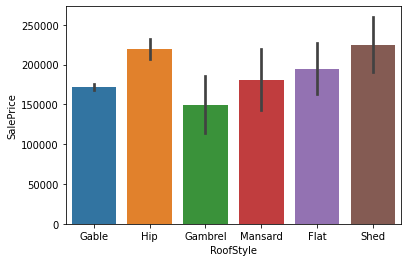

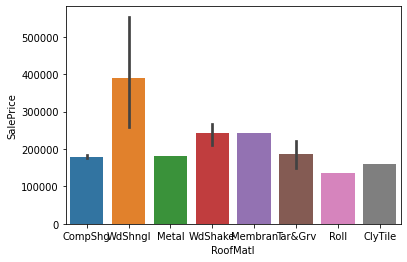

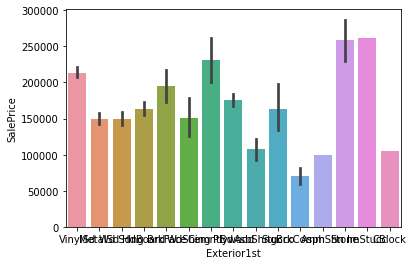

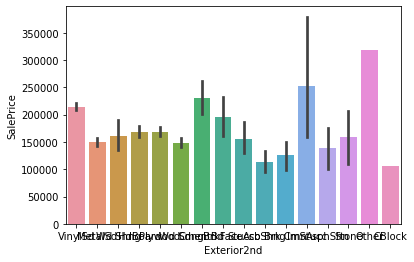

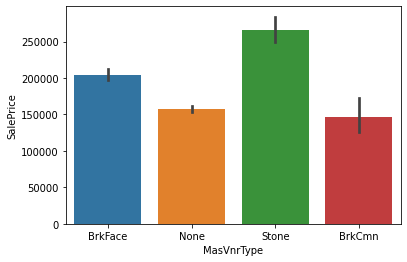

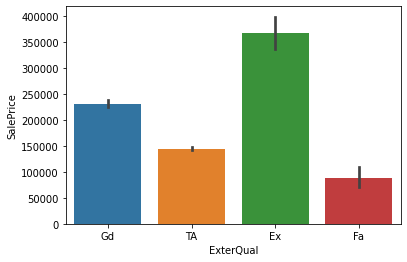

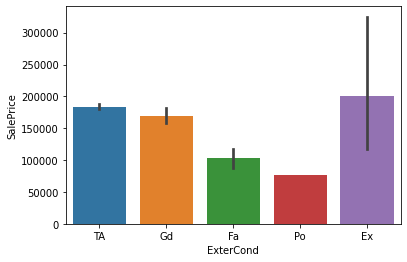

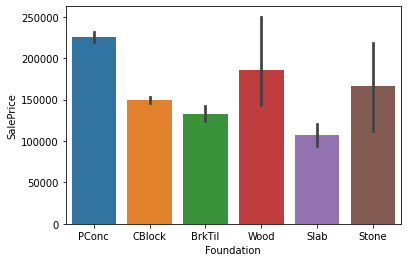

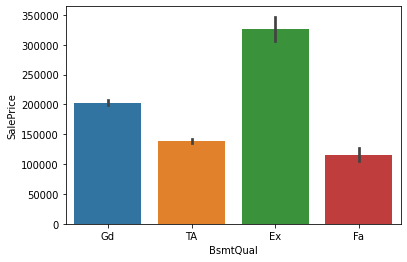

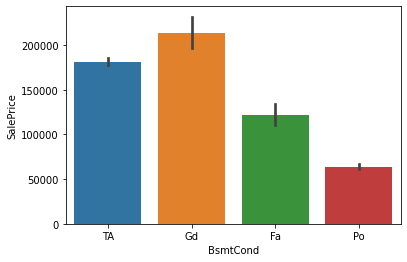

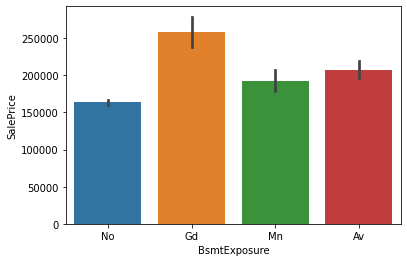

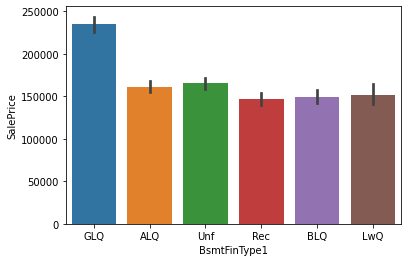

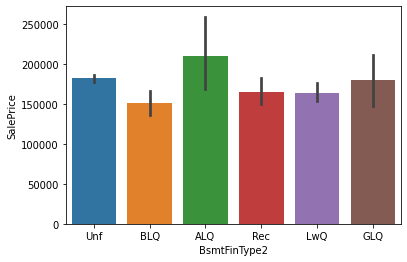

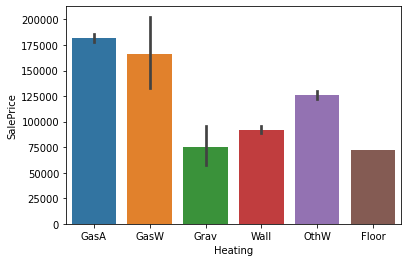

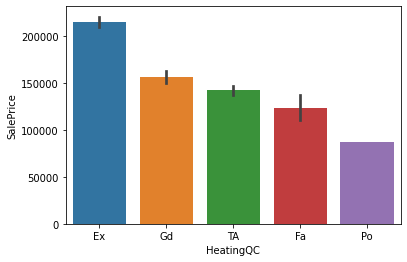

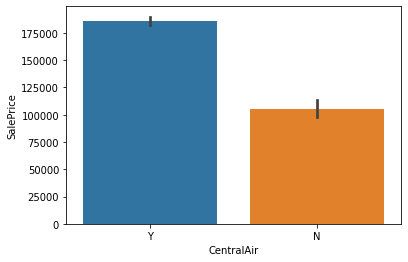

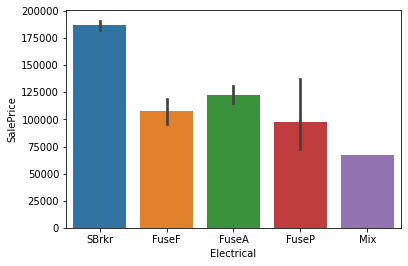

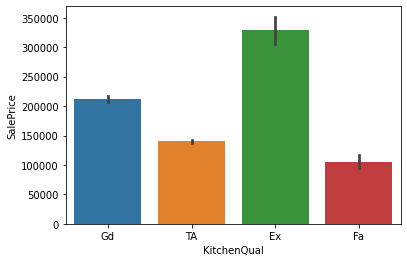

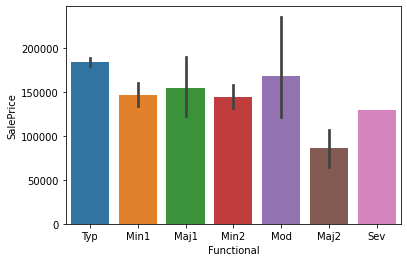

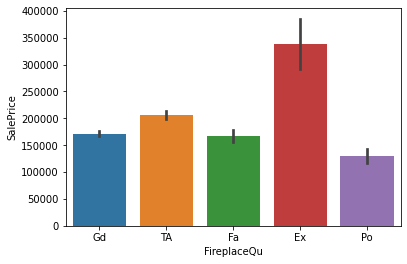

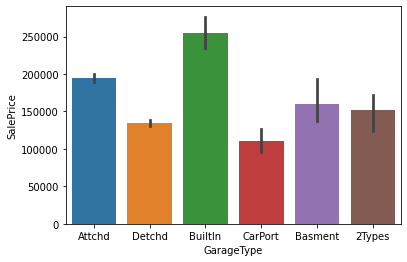

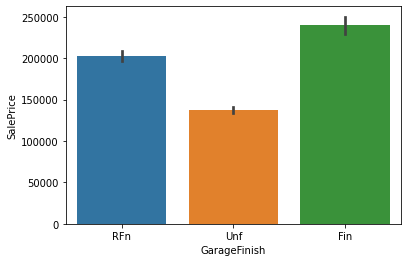

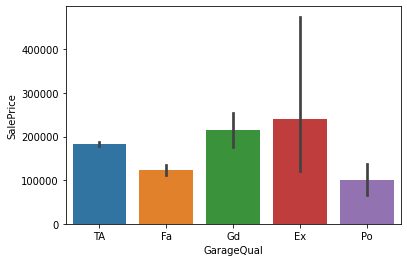

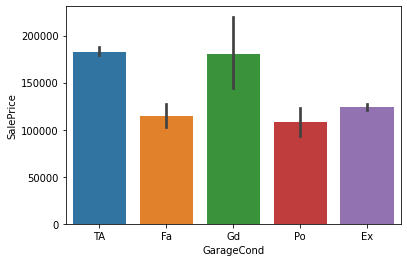

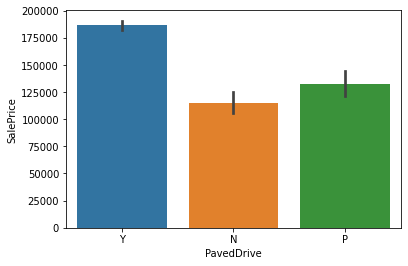

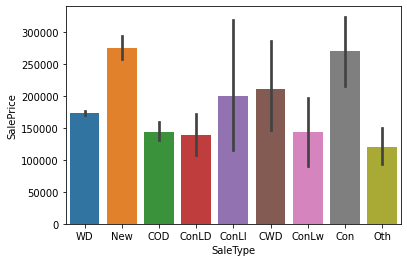

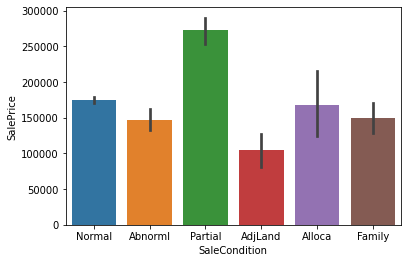

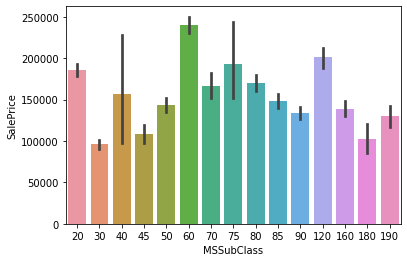

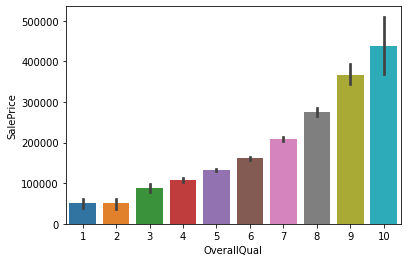

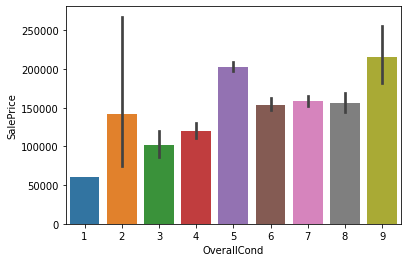

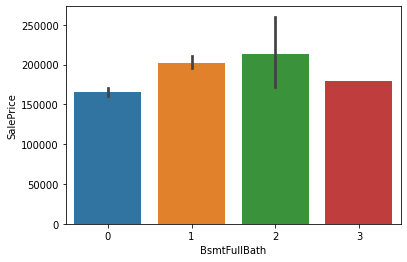

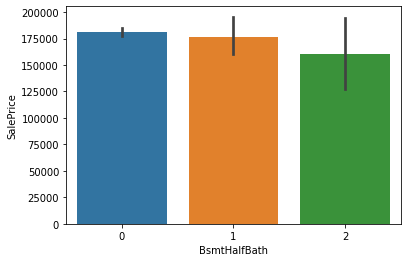

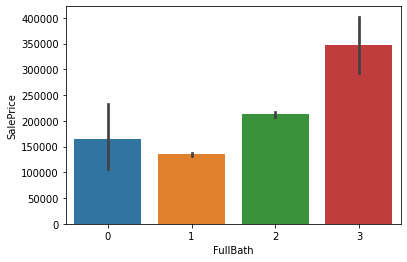

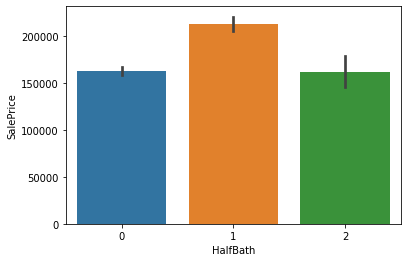

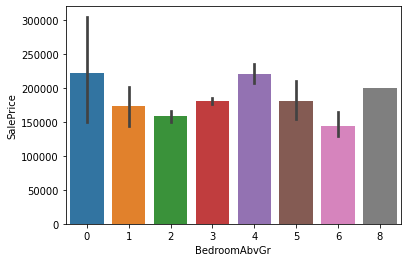

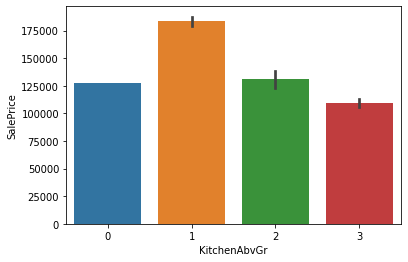

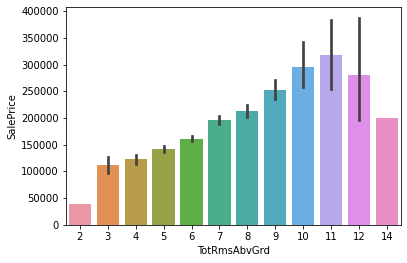

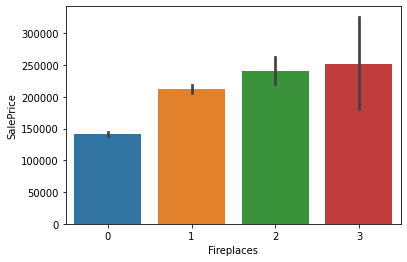

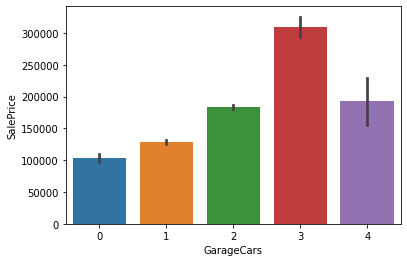

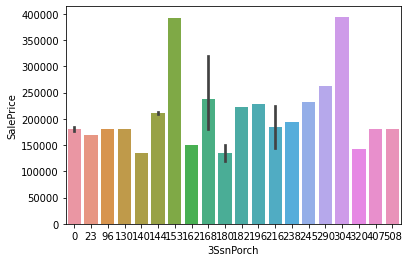

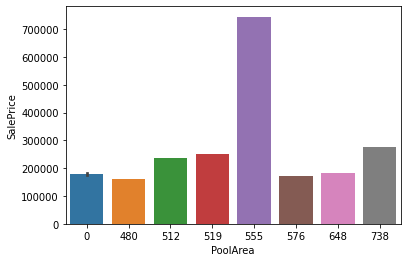

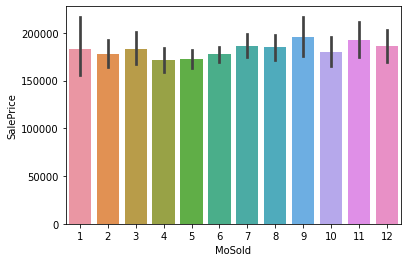

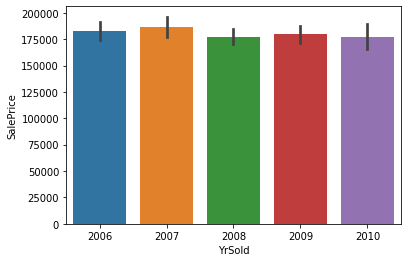

In [32]:
# checking relationship between categorical variables with target variable
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([y_train,char1],axis=1,join='inner')

from numpy import mean
for col in (char1.columns):
    plt.figure()
    sns.barplot(x=col, y="SalePrice",data=X_char_merged, estimator=mean )
plt.show()

In [33]:
# dropping those columns which have sigle barplot and have all barplot values that are less than mean of target variable
c=['Street','Utilities','BldgType','Heating','CentralAir','PavedDrive','BsmtHalfBath','KitchenAbvGr','YrSold','BldgType','Electrical','Functional']
char1=char1.drop(c,axis=1)

# Encoding

In [34]:
# encoding 
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
col=char1.columns
for i in col:
    char1[i]=le.fit_transform(char1[i])
char1.head() 

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,HouseStyle,RoofStyle,...,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MoSold
0,3,3,3,4,0,5,2,2,5,1,...,1,2,1,3,6,0,2,0,0,1
1,3,3,3,2,0,24,1,2,2,1,...,0,2,0,3,4,1,2,0,0,4
2,3,0,3,4,0,5,2,2,5,1,...,1,2,1,3,4,1,2,0,0,8
3,3,0,3,0,0,6,2,2,5,1,...,1,1,0,3,5,1,3,0,0,1
4,3,0,3,2,0,15,2,2,5,1,...,1,2,1,4,7,1,3,0,0,11


# Part 2 - Select K Best

In [35]:
# categorical feature selections
random_state=42
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=40)
selector.fit_transform(char1, y_train)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = char1.iloc[:,cols]

# Standardization

In [36]:
from sklearn.preprocessing import StandardScaler
sc_num = StandardScaler()
sc_num = sc_num.fit_transform(select_features_df_num)
#Convert to table format - StandardScaler
sc_num = pd.DataFrame(data=sc_num, columns=select_features_df_num.columns)

# Creating the Master Feature Set for Model Development

In [37]:
X_train=pd.concat([select_features_df_char,sc_num],axis=1,join="inner")

# Importing Testing Data

In [38]:
X_test=pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
y_test=pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [39]:
#selecting columns present in trading dataset
X_test1=pd.DataFrame(data=X_test, columns=X_train.columns)
y_test2=y_test.drop(['Id'],axis=1)

In [40]:
#spliting numerical and categorical data
ob=X_test1.select_dtypes(include='object')
nu=X_test1.select_dtypes(include='number')

In [41]:
#checking unique values for test data
df1_value_counts=pd.DataFrame(nu.apply(lambda x : unique_levels(x)))
df1_value_counts.columns=['feature_levels']
df1_value_counts.head()

,feature_levels
MSSubClass,16
OverallQual,10
OverallCond,9
BsmtFullBath,4
FullBath,5


In [42]:
# converting numerical data into categorical which have unique values less than 20
slice3=df1_value_counts.loc[df1_value_counts['feature_levels']<=20]
cat_list=slice3.index
cat1=nu.loc[:,cat_list]
cat1.shape

(1459, 14)

In [43]:
#updating categorical data
ob=pd.concat([ob,cat1],axis=1,join="inner")
ob.shape

(1459, 41)

In [44]:
# updating numerical data
slice4=df1_value_counts.loc[df1_value_counts['feature_levels']>20]
num_list=slice4.index
nu=nu.loc[:,num_list]
nu.shape

(1459, 10)

# Missing value handling

In [45]:
ob.isnull().sum()

MSZoning           4
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        16
ExterQual          0
Foundation         0
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
HeatingQC          0
KitchenQual        1
FireplaceQu      730
GarageType        76
GarageFinish      78
SaleType           1
SaleCondition      0
MSSubClass         0
OverallQual        0
OverallCond        0
BsmtFullBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         1
3SsnPorch          0
PoolArea           0
MoSold             0
LowQualFinSF       0
dtype: int64

In [46]:
ob1=ob.fillna({'FireplaceQu': ob.FireplaceQu.mode()[0],'MSZoning': ob.MSZoning.mode()[0],'BsmtCond':ob.BsmtCond.mode()[0],
                    'BsmtQual':ob.BsmtQual.mode()[0],'MasVnrType': ob.MasVnrType.mode()[0],'BsmtFinType2':ob.BsmtFinType2.mode()[0],
                    'BsmtExposure':ob.BsmtExposure.mode()[0],'BsmtFinType1':ob.BsmtFinType1.mode()[0],
                    'Exterior1st':ob.Exterior1st.mode()[0],'Exterior2nd':ob.Exterior2nd.mode()[0],'SaleType':ob.SaleType.mode()[0],
                    'GarageType':ob.GarageType.mode()[0],'GarageFinish':ob.GarageFinish.mode()[0],
                    'KitchenQual':ob.KitchenQual.mode()[0],'GarageCars':ob.GarageCars.mode()[0],
                    'BsmtFullBath':ob.BsmtFullBath.mode()[0]})
ob1.isnull().sum()


MSZoning         0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
HeatingQC        0
KitchenQual      0
FireplaceQu      0
GarageType       0
GarageFinish     0
SaleType         0
SaleCondition    0
MSSubClass       0
OverallQual      0
OverallCond      0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
3SsnPorch        0
PoolArea         0
MoSold           0
LowQualFinSF     0
dtype: int64

In [47]:
nu.isnull().sum()

LotFrontage    227
LotArea          0
MasVnrArea      15
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
dtype: int64

In [48]:
nu1=nu.fillna({'TotalBsmtSF' : nu.TotalBsmtSF.mean(),'BsmtUnfSF':nu.BsmtUnfSF.mean(), 'BsmtFinSF2':nu.BsmtFinSF2.mean(),
               'MasVnrArea':nu.MasVnrArea.mean(),
               'BsmtFinSF1':nu.BsmtFinSF1.mean(),'LotFrontage':nu.LotFrontage.mean()
              })
nu1.isnull().sum()

LotFrontage    0
LotArea        0
MasVnrArea     0
BsmtFinSF1     0
BsmtFinSF2     0
BsmtUnfSF      0
TotalBsmtSF    0
1stFlrSF       0
2ndFlrSF       0
GrLivArea      0
dtype: int64

# Standardization

In [49]:
from sklearn.preprocessing import StandardScaler
sc_num1 = StandardScaler()
sc_num1 = sc_num1.fit_transform(nu1)
#Convert to table format - StandardScaler 
num2 = pd.DataFrame(data=sc_num1, columns=nu1.columns)

# Encoding

In [50]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
col=ob1.columns
for i in col:
    ob1[i]=le.fit_transform(ob1[i])

# Creating the Master Feature Set for Model Testing

In [51]:
# concatination of numerical and categorical data
X_test2=pd.concat([ob1,num2],axis=1,join="inner")

In [52]:
X_test2.shape

(1459, 51)

# Sale Price Rate

In [53]:
# comparing sale price rate for traing and testing data
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test2.shape)
print("sale price Rate in Training Data",y_train.mean())
print("sale price Rate in Testing Data",y_test2.mean())

Shape of Training Data (1460, 51)
Shape of Testing Data (1459, 51)
sale price Rate in Training Data SalePrice    180921.19589
dtype: float64
sale price Rate in Testing Data SalePrice    179183.918243
dtype: float64


# Model Building

In [54]:
# build linear regression model
import statsmodels.api as sm
X_endog = sm.add_constant(X_test2)
res = sm.OLS(y_test2, X_endog)
model=res.fit()
pred1=model.predict(X_endog)

# Measuring Errors

In [55]:
# checking MAE, MSE AND RMSE values  
from sklearn import metrics

print('MAE :', metrics.mean_absolute_error(y_test2, pred1))
print('MSE :', metrics.mean_squared_error(y_test2, pred1))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test2, pred1)))

MAE : 963.9467917737173
MSE : 1270075.9772074672
RMSE : 1126.976475889123


# Rig Plot

<AxesSubplot:xlabel='SalePrice'>

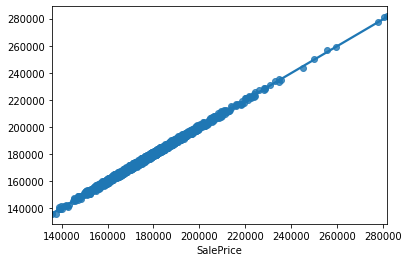

In [56]:
# linear regression plot
sns.regplot(x=y_test2, y=pred1, data=pred1)

# Summary

In [57]:
# summary of model prediction
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     6017.
Date:                Sat, 14 Aug 2021   Prob (F-statistic):               0.00
Time:                        18:09:34   Log-Likelihood:                -12323.
No. Observations:                1459   AIC:                         2.475e+04
Df Residuals:                    1408   BIC:                         2.502e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.353e+05    579.408    233.561      0.000    1.34e+05    1.36e+05
MSZoning         38.9793     49.731      0.784      0.433     -58.575     136.534
LotShape        -13.6447     24.594     -0.555      0.579     -61.889      34.600
LandContour     -12.4748     48.679     -0.256      0.798    -107.966      83.016
LotConfig         4.9924     19.818      0.252      0.801     -33.884      43.868
LandSlope      -244.8384    157.680     -1.553      0.121    -554.152      64.475
Neighborhood     -4.5686      5.660     -0.807      0.420     -15.672       6.535
Condition1       53.7507     35.462      1.516      0.130     -15.813     123.314
HouseStyle      -11.5864     26.729     -0.433      0.665     -64.019      40.846
RoofStyle         7.0303     42.168      0.167      0.868     -75.689      89.750
RoofMatl        140.1831    200.609      0.699      0.485    -253.341     533.707
Exterior1st     -75.5166     23.839     -3.168      0.002    -122.279     -28.754
Exterior2nd      47.9009     18.815      2.546      0.011      10.992      84.810
MasVnrType      -55.8381     57.555     -0.970      0.332    -168.740      57.064
ExterQual       122.6718     68.543      1.790      0.074     -11.786     257.130
Foundation       41.8912     54.514      0.768      0.442     -65.046     148.829
BsmtQual         16.7022     49.809      0.335      0.737     -81.006     114.411
BsmtCond        -52.5713     45.362     -1.159      0.247    -141.557      36.414
BsmtExposure    -68.3559     33.654     -2.031      0.042    -134.374      -2.338
BsmtFinType1     -0.4280     22.857     -0.019      0.985     -45.266      44.410
BsmtFinType2     82.4187     43.860      1.879      0.060      -3.619     168.456
HeatingQC        -1.7269     21.623     -0.080      0.936     -44.144      40.690
KitchenQual     -10.7239     53.691     -0.200      0.842    -116.048      94.600
FireplaceQu       4.5754     40.230      0.114      0.909     -74.342      83.493
GarageType      -22.4325     22.095     -1.015      0.310     -65.775      20.910
GarageFinish    -23.5632     50.607     -0.466      0.642    -122.836      75.709
SaleType        -27.5241     19.500     -1.411      0.158     -65.777      10.729
SaleCondition    54.5289     31.017      1.758      0.079      -6.316     115.374
MSSubClass        4.5178      9.541      0.474      0.636     -14.198      23.234
OverallQual      37.6292     39.501      0.953      0.341     -39.858     115.116
OverallCond       0.2854     31.461      0.009      0.993     -61.430      62.001
BsmtFullBath    -39.8002     78.402     -0.508      0.612    -193.597     113.996
FullBath       -125.7193     86.036     -1.461      0.144    -294.492      43.054
HalfBath       -141.2664     86.866     -1.626      0.104    -311.668      29.135
BedroomAbvGr    1.32e+04     57.009    231.532   